# Transverse Vibration of a uniform Euler-Bernoilli beam:

 Let us consider a uniform Euler-Bernoulli beam of length L.  Transverse Vibrations of the bean are given by the following Partial Differential Equation of motion:


$\cfrac{\partial^{2}u(x,t)}{\partial t^2}+c^2\cfrac{\partial^{4}u(x,t)}{\partial t^4}= 0 \,\,\,\,\, c^2 = \cfrac {EI}{\rho A} \,\,\,\,\, \omega_n = c\beta_n^2 = \beta_n^2 \sqrt{\cfrac {EI}{\rho A}} $

Where the general solution is given by the following equation from which the natural frequencies may be found:



$F(x) = A cos(\beta x)+B sin(\beta x)+C cosh(\beta x)+ D sinh(\beta x)$

The function $F(x)$ is known as the normal mode or characteristic function of the beam and $\omega$ is called the natural frequency of vibration. For a beam, there will be an infinite number of normal modes with one natural frequenc  associated with each normal mode. The unknown constants $A$ to $D$ in the previous equation and the value of $\beta$ can be determined from the boundary conditions of the beam as indicated below.

Boundary Condition| Frequency equation | Mode Shape                                                  |
  -------------   | -------------------| ------------------------------------------------------------|
  Free-Free  | cos $\beta_n L$cosh$(\beta_n L) = 1$| $P_n(x)$$-\cfrac{Q_n(L)}{S_n(L)}$$R_n(x)$ 
  Fixed-Free  |cos $\beta_n L$cosh$(\beta_n L) = -1$ |$Q_n(x)$ $-\cfrac {S_n(L)}{P_n(L)}$$ S_n(x)$ 
  Fixed-Pinned|tan $\beta_n L-$ tanh$\beta_n L = 0$ |$Q_n(x)$$-\cfrac {Q_n(L)}{S_n(L)}$$ S_n(x)$ 
  Fixed-Fixed |cos $\beta_n L$cosh$(\beta_n L) = 1$ |$Q_n(x)$$-\cfrac {Q_n(L)}{S_n(L)}$$ S_n(x)$ 
  Pinned-Pinned |sin$\beta_n L = 0$ | sin $\cfrac{n\pi x}{L}$

where $(\beta_nL)^2$ are the spatial frequencies

and we also have,
$$P_n(x) = cosh\beta_nx + cos\beta_nx $$
$$Q_n(x) = cosh\beta_nx - cos\beta_nx $$
$$R_n(x) = sinh\beta_nx + sin\beta_nx $$
$$S_n(x) = sinh\beta_nx - sin\beta_nx $$

## Initialization

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve
%matplotlib inline

## Input 

Here as input, we will take values of Length L (in $m$), radius  R (in $m$) of the beam and material properties: Youngs modulus E (in $Pa$) and density $\rho$ (in $kg/m^3$).

In [4]:
L = float(input('Enter Length in [m]=  ')) #% insert 1 (i.e.)
R = float(input('Enter Radius in [m]= ')) #% insert 0.02 (i.e.)
Ix = (1/4)*np.pi*R**4
A = np.pi*R**2
E = float(input("Enter Young's modulus in [Pa]=  "))  # e.g. 70e9 Pa
Rho = 27e3

Enter Length in [m]=  2
Enter Radius in [m]= 0.02
Enter Young's modulus in [Pa]=  70e9


Initial values of $\beta_n L$ are:

<span style="color: red">
I would rather use `np.array` instead of `np.asarray` for array creation. In this case it doesn't really make the difference, but `np.array` allows you to set more options.
</span>

In [41]:
# a0 = np.asarray([4.7, 7.2, 10.8, 14])  # for boundarie condition Free-Free & Fixed-Fixed
# z0 = np.asarray([1.8, 4.7, 7.2, 10.8])  # for boundarie condition Fixed-Free
# u0 = np.asarray([3.7, 6, 10, 13])   # for Bc Fixed-Pinned
# p0 = np.asarray([3, 6.2, 9.3, 12.5])  # for Pinned-Pinned

a0 = np.array([4.7, 7.2, 10.8, 14])  # for boundarie condition Free-Free & Fixed-Fixed
z0 = np.array([1.8, 4.7, 7.2, 10.8])  # for boundarie condition Fixed-Free
u0 = np.array([3.7, 6, 10, 13])   # for Bc Fixed-Pinned
p0 = np.array([3, 6.2, 9.3, 12.5])  # for Pinned-Pinned

In [ ]:
def a(x):
    return np.cos(x)*np.cosh(x)-1
def z(x):
    return np.cos(x)*np.cosh(x)+1
def u(x):
    return np.tan(x)-np.tanh(x)
def p(x):
    return np.sin(x)

<span style="color: red">
As you know the size of the solution, it is more efficient to initialize an empty array (or an array of zeros) than to make appends to a list.
</span>

In [ ]:
# an = []
# zn = [] 
# un = [] 
# pn = [] 
# F = []
# Q = []
# K = []

an = np.zeros_like(a0)
zn = np.zeros_like(a0)
un = np.zeros_like(a0)
pn = np.zeros_like(a0) 
# F = np.zeros_like(a0)  You don't need to initialize these ones.
# Q = np.zeros_like(a0)
# K = np.zeros_like(a0)

In [ ]:
# for i in range(len(a0)): 
# #% fzero to obtain the spatial frecuencies
#     AN = (fsolve(a,a0[i]))#;% FeFe & FiFi
#     an.append(AN)
#     ZN = (fsolve(z,z0[i]))#;% FiFe
#     zn.append(ZN)
#     UN = (fsolve(u,u0[i]))#;% FiPi
#     un.append(UN)
#     PN = (fsolve(p,p0[i]))#;% PiPi
#     pn.append(PN)

for i in range(len(a0)): 
#% fzero to obtain the spatial frecuencies
    an[i] = (fsolve(a, a0[i]))  # FeFe & FiFi
    zn[i] = (fsolve(z, z0[i]))  # FiFe
    un[i] = (fsolve(u, u0[i]))  # FiPi
    pn[i] = (fsolve(p,p0[i]))  # PiPi

<span style="color: red">
When dealing with arrays it is much more efficient to use vectorized operations than to loop the array.
</span>

In [42]:
# #% coeficients Qn(L)/Sn(L) and Sn(L)/Pn(L) theres no need for coeficients
# # for PiPi boundary condition
#     f = (np.cosh(an[i])- np.cos(an[i]))/(np.sinh(an[i])-np.sin(an[i]))#;% Qn(L)/Sn(L) for FeFe and FiFi
#     F.append(f)
#     k = (np.sinh(zn[i])- np.sin(zn[i]))/(np.cosh(zn[i])-np.cos(zn[i]))#;% Sn(L)/Pn(L) for FiFe
#     K.append(k)
#     q = (np.cosh(un[i])- np.cos(un[i]))/(np.sinh(un[i])-np.sin(un[i]))#;% Qn(L)/Sn(L) for FiPi
#     Q.append(q)

# coeficients Qn(L)/Sn(L) and Sn(L)/Pn(L) theres no need for coeficients
# for PiPi boundary condition
F = (np.cosh(an)- np.cos(an))/(np.sinh(an)-np.sin(an))  # Qn(L)/Sn(L) for FeFe and FiFi
K = (np.sinh(zn)- np.sin(zn))/(np.cosh(zn)-np.cos(zn))  # Sn(L)/Pn(L) for FiFe
Q = (np.cosh(un)- np.cos(un))/(np.sinh(un)-np.sin(un))#;% Qn(L)/Sn(L) for FiPi


# dividing the spatial frecuencies by L to get de Bn value for each bc
# an = np.asarray(an)/L  # FeFe & FiFi
# zn = np.asarray(zn)/L  # FiFe
# un = np.asarray(un)/L  # FiPi
# pn = np.asarray(pn)/L  # PiPi

# These variables are arrays already.
an = an / L  # FeFe & FiFi 
zn = zn / L  # FiFe
un = un / L  # FiPi
pn = pn / L  # PiPi

# natural frecuencies Wn=2*pi*fn fn=nat.frecuency
# fn=Wn/(2*pi)=(Bn^2*(SQRT((E*I)/(Ro*A)))/2*pi
fna = (an**2*np.sqrt((E*Ix)/(Rho*A)))/(2*np.pi)  # FeFe & FiFi
fnz = (zn**2*np.sqrt((E*Ix)/(Rho*A)))/(2*np.pi)  # FiFe
fnu = (un**2*np.sqrt((E*Ix)/(Rho*A)))/(2*np.pi)  # FiPi
fnp = (pn**2*np.sqrt((E*Ix)/(Rho*A)))/(2*np.pi)  # PiPi

In [47]:
# x = np.linspace(0, L, 180)
# Shouldn't you let the user choose the number of points?
N = int(input('Choose number of nodes along the beam)'))

xl =  x/L

# You can use these functions directly insede the loop without eval.

# Tc0 = '(np.cosh(an[ii]*x[j])+np.cos(an[ii]*x[j]))-F[ii]*(np.sinh(an[ii]*x[j])+np.sin(an[ii]*x[j]))'# FeFe
# Tc1 = '(np.cosh(zn[ii]*x[j])-np.cos(zn[ii]*x[j]))-K[ii]*(np.sinh(zn[ii]*x[j])-np.sin(zn[ii]*x[j]))'# FiFe
# Tc2 = '(np.cosh(un[ii]*x[j])-np.cos(un[ii]*x[j]))-Q[ii]*(np.sinh(un[ii]*x[j])-np.sin(un[ii]*x[j]))'# FiPi
# Tc3 = '(np.cosh(an[ii]*x[j])-np.cos(an[ii]*x[j]))-F[ii]*(np.sinh(an[ii]*x[j])-np.sin(an[ii]*x[j]))'# FiFi
# Tc4 = '(np.sin(pn[ii]*x[j]))'# PiPi

# As in loops the results may disappear we need matrices to store the
# results for each spatial frecuency and for each BoundaryCondition

# In Python this is better normally called shape (in matlab is size)
# size = (4, len(x))
shape = (4, len(x))
Xnx0 = np.zeros(shape)# FeFe with 4 rows for each of the first spatial frecuencies and all the columns needed to cover al the linspace of "x"
Xnx1 = np.zeros(shape)# FiFe
Xnx2 = np.zeros(shape)# FiPi
Xnx3 = np.zeros(shape)# FiFi
Xnx4 = np.zeros(shape)# PiPi
# loop to obtain all the values of each boundary condition mode shape,
# defining the matrices, the components of each matrix row must be the
# solution for each "x" from the linspace of the beam of the equation of
# each mode shape of each boundary condition
for ii in range(4):
    for j in range(len(x)):
        Xnx0[ii,jj] = np.cosh(an[ii]*x[jj])+np.cos(an[ii]*x[jj]))-F[ii]*(np.sinh(an[ii]*x[jj])+np.sin(an[ii]*x[jj])  # FeFe
#       Change the rest
                                                                         
#         Xnx1[ii,j]=eval(Tc1)# FiFe
#         Xnx2[ii,j]=eval(Tc2)# FiPi
#         Xnx3[ii,j]=eval(Tc3)# FiFi
#         Xnx4[ii,j]=eval(Tc4)# PiPi

<span style="color: red">
Moreover, if you don't need information from other nodes rather than the one you are iterating (ie. you are not using jj-1 or ii+1) you can avoid the loop and vectorize the operation.
</span>

<span style="color: red">
In this cell you can make the same kind of corrections: avoid using eval, vecotrize and allocate (do not use appends if you know the size)
</span>

In [170]:
# One can select the natural frequency
#float(input('Enter w in [sec-1]=  '))
W = 34 
Bt = np.sqrt(W/(2*np.pi*L*np.sqrt((E*Ix)/(Rho*A))))
t = np.linspace(0, L, 180)
tl = t/L

Ft = (np.cosh(Bt*(L**2))-np.cos(Bt*(L**2)))/(np.sinh(Bt*(L**2))-np.sin(Bt*(L**2)))# Qn(L)/Sn(L) for FeFe and FiFi
Kt = (np.sinh(Bt*(L**2))-np.sin(Bt*(L**2)))/(np.cosh(Bt*(L**2))-np.cos(Bt*(L**2)))# Sn(L)/Pn(L) for FiFe
Qt = (np.cosh(Bt*(L**2))-np.cos(Bt*(L**2)))/(np.sinh(Bt*(L**2))-np.sin(Bt*(L**2)))# Qn(L)/Sn(L) for FiPi

T0 = '(np.cosh(Bt*x[j])+np.cos(Bt*x[j]))-Ft*(np.sinh(Bt*x[j])+np.sin(Bt*x[j]))'# FeFe
T1 = '(np.cosh(Bt*x[j])-np.cos(Bt*x[j]))-Kt*(np.sinh(Bt*x[j])-np.sin(Bt*x[j]))'# FiFe
T2 = '(np.cosh(Bt*x[j])-np.cos(Bt*x[j]))-Qt*(np.sinh(Bt*x[j])-np.sin(Bt*x[j]))'# FiPi
T3 = '(np.cosh(Bt*x[j])-np.cos(Bt*x[j]))-Ft*(np.sinh(Bt*x[j])-np.sin(Bt*x[j]))'# FiFi
T4 = '(np.sin(Bt*x[j]))'#;% PiPi

ss = (1,len(x))
Xx0 = []
Xx1 = []
Xx2 = []
Xx3 = []
Xx4 = []

#for Xx0 in range(0,len(x)):
for j in range(0,len(x)):
    XX0 =eval(T0)        # FeFe
    Xx0.append(XX0) 
    XX1=eval(T1)         # FiFe
    Xx1.append(XX1)
    XX2=eval(T2)         # FiPi
    Xx2.append(XX2)
    XX3=eval(T3)         # FiFi
    Xx3.append(XX3)
    XX4 =eval(T4)        # PiPi 
    Xx4.append(XX4)

    
Tt1 = np.zeros(len(t))
Tt1 = np.vstack(np.cos(W*t))

Mv0=np.multiply(Tt1,Xx0)
Mv1=np.multiply(Tt1,Xx1)
Mv2=np.multiply(Tt1,Xx2)
Mv3=np.multiply(Tt1,Xx3)
Mv4=np.multiply(Tt1,Xx4)

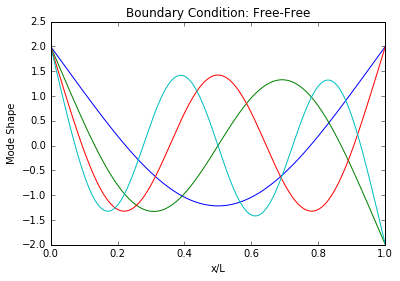

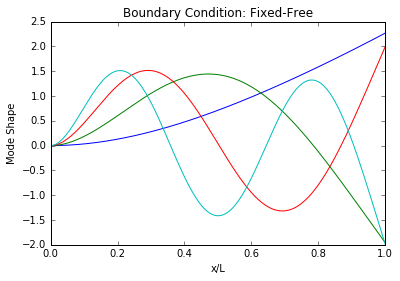

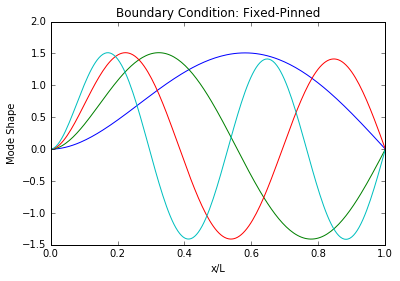

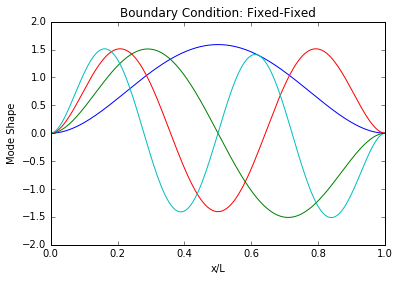

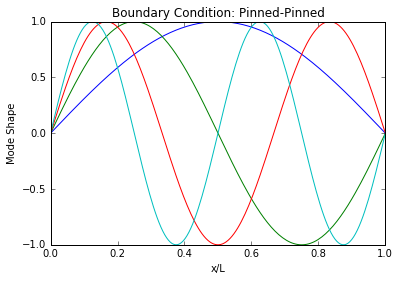

In [189]:
#mode = {'1': Xnx0, '2': Xnx1, '3': Xnx2}
modes = [Xnx0, Xnx1, Xnx2, Xnx3, Xnx4]
titles =['Free-Free','Fixed-Free','Fixed-Pinned','Fixed-Fixed','Pinned-Pinned']
for j in range(len(modes)):
    temp = modes[j]
    figure = plt.figure(temp)
    for ii in range(4):
        plt.plot(xl, temp[ii,:])
        plt.xlabel('x/L')
        plt.ylabel('Mode Shape')
#         plt.hold(True)  I think you don't need this (matplolib holds by default)
        tt = titles[j]
        plt.title("Boundary Condition: %s" %tt) 
        #plt.legend(plot[ii],modes[j])

## Interactive Plotting
This is for creating interactive plotting for the same thing shown above. The user can select the modeshape and boundary conditions in this case.

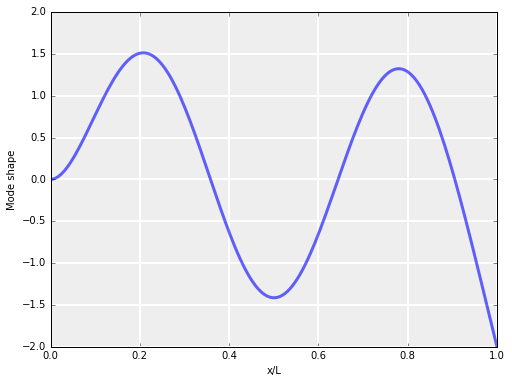

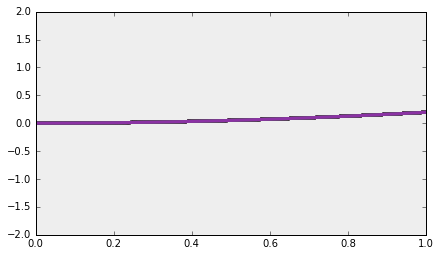

In [46]:
###########################################################################
# Interactive plotting for different mode shapes
# and different Boundary Conditions.
#
###########################################################################
from ipywidgets import interact, IntSlider, RadioButtons
mode_slider = IntSlider(min=0, max=3, step=1, value=1)
bc_buttons = RadioButtons(options=['Free-Free', 'Fixed-Free', 'Fixed-Pinned','Fixed-Fixed','Pinned-Pinned'])
animation = IntSlider(min=0, max = 180, step=1,value=1)

###########################################################################

plt.close()
@interact(Mode=mode_slider, Boundary_Condition=bc_buttons, Anim=animation)
def plot(Mode, Boundary_Condition,Anim):
    fig, ax = plt.subplots(figsize=(8, 6),
                       subplot_kw={'axisbg':'#EEEEEE',
                                   'axisbelow':True})
    if (Boundary_Condition == 'Free-Free'):
        PP = Xnx0
        P = Mv0
    elif (Boundary_Condition == 'Fixed-Free'):
        PP = Xnx1
        P = Mv1        
    elif (Boundary_Condition == 'Fixed-Pinned'):
        PP = Xnx2
        P = Mv2
    elif (Boundary_Condition == 'Fixed-Fixed'):
        PP = Xnx3
        P = Mv3
    elif (Boundary_Condition == 'Pinned-Pinned'):    
        PP = Xnx4
        P = Mv4
        
    ax.grid(color='w', linewidth=2, linestyle='solid')
    ax.plot(xl, PP[Mode,:],
        lw=3, alpha=0.6)
    plt.xlabel('x/L')
    plt.ylabel('Mode shape')
    
    
    
    fig2,ax2 = plt.subplots(figsize=(7, 4),
                       subplot_kw={'axisbg':'#EEEEEE',
                                   'axisbelow':True})
    for ii in range(len(xl)):
        ax2.plot(xl, P[Anim,:],
        lw=3, alpha=0.6)
        plt.ylim(-2,2)
